In [1]:
import sys
print(sys.version)
import keras
import tensorflow as tf

3.6.5 (default, Jan 30 2019, 22:59:59) 
[GCC 4.2.1 Compatible Apple LLVM 10.0.0 (clang-1000.10.44.4)]


Using TensorFlow backend.


In [2]:
# MNISTのデータセットをDL
from keras.datasets import mnist
(x_train_non_test, y_train_non_test), (x_test, y_test) = mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
# 検証セットが無いので、訓練セットからスライスして作成
test_size=0.175
x_train, x_valid, y_train, y_valid = train_test_split(x_train_non_test, y_train_non_test, test_size=test_size)

print(len(x_train))
print(len(x_train[0]))
print(len(x_train[0][0]))

49500
28
28


In [4]:
# モデル作成
# modelは複数のlayerのstack
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
# 入力 (input)
# (28px: 784)
# 畳み込み層
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 中間層 (hidden)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 出力層 (output)
# 全結合層
model.add(Dense(10, activation='softmax'))

In [5]:
# x28:grayscale → 28,28,1へreshape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 0-1へ変換
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_valid /= 255
x_test /= 255

# one hot
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [23]:
# 訓練
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(),
             metrics=['accuracy'])

history = model.fit(x_train, y_train,
                   batch_size=128,
                   epochs=10,
                   verbose=1,
                   validation_data=(x_valid, y_valid))

Train on 49500 samples, validate on 10500 samples


AttributeError: 'PlotLosses' object has no attribute 'epochs'

In [17]:
# 評価
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accc:', score[1])

test loss: 0.04245327046887514
test accc: 0.9888


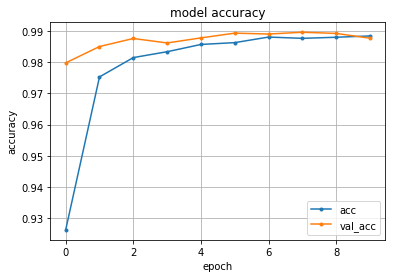

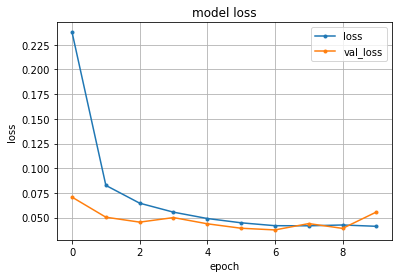

In [9]:
from matplotlib import pyplot as plt

# accc
plt.plot(history.history['acc'], marker='.', label='acc')
plt.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('model accuracy')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# loss
plt.plot(history.history['loss'], marker='.', label='loss')
plt.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('model loss')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

In [26]:
# from keras.callbacks import Callback
import keras

class PlotLosses(keras.callbacks.Callback):
    """live plot"""
    
    def on_train_begin(self, logs={}):
        self.epoch_cnt = 0
        plt.axis([0, self.epochs, 0 , 0.25])
        plt.ion()
        
    def on_train_end(self, logs={}):
        plt.ioff()
        plt.legend(['loss', 'val_loss'], loc='best')
        plt.show()
        
    def on_epoch_end(self, epoch, log={}):
        loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        x = self.epoch_cnt
        
        plt.scatter(x, loss, c='b', label='loss')
        plt.scatter(x, val_loss, c='r', label='val_loss')
        plt.pause(0.05)
        
        self.epoch_cnt += 1
